In [1]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
# sys.path.insert(0, '/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
import StructureFactor
from scipy import linalg as la
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite/'
# pathpc='/home/juan/Documents/Projects/BM_bandstructure'
# pathy=pathMAC
pathy=pathchow

In [3]:
# # #electronic parameters
J=2*5.17 #in mev
tp1=568/J #in units of Js\
tp2=-tp1*108/568 #/tpp1
##coupling 
U=4000/J
g=100/J
Kcou=g*g/U
# fill=0.67 #van hove
fill=0.5


##########################
##########################
# Geometry/Lattice
##########################
##########################
Npoints=1000
Npoints_int_pre, NpointsFS_pre=2000,600
save=True
l=Lattice.TriangLattice(Npoints_int_pre, save,'CH1')
Vol_rec=l.Vol_BZ()
l2=Lattice.SQLattice(Npoints, save, 'CH1')
Vol_rec2=l2.Vol_BZ()



# ##########################
# ##########################
# # Fermi surface and structure factor
# ##########################
# ##########################
ed=Dispersion.Dispersion_TB_single_band([tp1,tp2],fill,'CH1')

# ed=Dispersion.Dispersion_circ([tp1,tp2],fill)
[KxFS,KyFS]=ed.FS_contour(NpointsFS_pre)

Machine arg is, CH1
Machine arg is, CH1
started calculating filling for chemical potential and dispersion parameters TB_single_band..
Machine arg is, CH1
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
Machine arg is, CH1
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
norm of Dos, 42.97093206665365 45.58575006211245
sum of the hist, normed? 42.97093206665365
finished calculating filling for chemical potential
Filling: 0.49313107609556217 .... chemical potential: 23.93702777725383
Machine arg is, CH1
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
sum of the hist, normed? 0.9999999999999923
starting contour.....
finished contour..... 3.600423574447632


In [4]:
def Fermi_Vel(kx,ky):
    sq3y2=np.sqrt(3)*ky/2
    sq3y=np.sqrt(3)*ky
    vx=-tp1*(-2*np.cos(sq3y2)*np.sin(kx/2)-2*np.sin(kx)) +6*tp2*np.cos(sq3y2)*np.sin(3*kx/2)
    vy=2*np.sqrt(3)*tp1*np.cos(kx/2)*np.sin(sq3y2)-2*np.sqrt(3)*tp2*(-np.cos(3*kx/2)*np.sin(sq3y2)-np.sin(sq3y))
    return [vx,vy]



In [5]:
path=pathy+'data/tempsweep_radial_ME_scan__2022-05-05-07-24-15'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
# path=pathy+'/data/tempsweep_diffpeak_2022-02-12-13-44-44'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])

reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__10/data_ME_2022-05-05-07-24-14.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__3/data_ME_2022-05-04-19-32-39.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__2/data_ME_2022-05-04-15-34-20.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__5/data_ME_2022-05-05-03-31-35.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__4/data_ME_2022-05-04-23-32-04.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/

# Single Figs

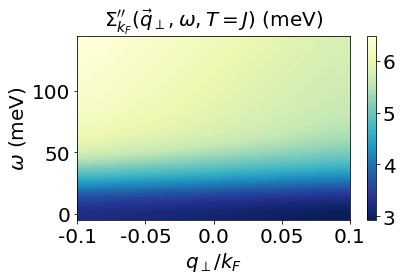

In [6]:

df2=df.sort_values(by=['theta','freq', 'Q' ])
tss=float(df2['T'].unique()[0])
df2.loc[(df2['theta'] == -4*np.pi/6)]
df2['Q']=-df2['Q']*np.sign(df2['QFX'])
T=1.0
df_one_temp=df2.loc[(df2['theta'] == -4*np.pi/6)&(df2['T'] == T)]
# d=df_one_temp.pivot(index='freq', columns='Q', values='SE')

def draw_heatmap(df,*args, **kwargs):
   
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    # sns.heatmap(d, **kwargs)
    # im =pcolor(x,y,se[1],vmin=np.min(se[1]), vmax=np.max(se[1]))
    vmi=2.931474
    vma=6.484698
    # print(np.max(d), np.min(d))
    im=plt.imshow(d,vmin=vmi, vmax=vma, cmap='YlGnBu_r', interpolation = 'bicubic',aspect='auto',origin='lower')
    title(r"$\Sigma_{k_F} ''(\vec{q}_{\perp},\omega, T=J)$ (meV)", size=20)
    ylabel(r"$\omega$ (meV)", size=20)
    xlabel(r"$q_{\perp}/k_F$ ", size=20)
    cbar = plt.colorbar(im)
    tick_font_size = 20
    cbar.ax.tick_params(labelsize=tick_font_size)
    xt=[-0.1,-0.05,0.0,0.05,0.1]
    yt=[0,50,100]
    xtpos=np.array([0,2.5,5, 7.5,10])-0.5
    ytpos=np.array([0,5 ,10])
    xticks(xtpos,xt,size=20)
    yticks(ytpos,yt,size=20)
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=7)
    plt.tight_layout()
    savefig("imgs/pap_fig2a.png", dpi=400)
    show()

draw_heatmap(df_one_temp, 'Q', 'freq', 'SE')



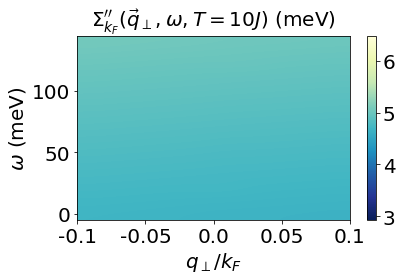

In [7]:
df2=df.sort_values(by=['theta','freq', 'Q' ])
tss=float(df2['T'].unique()[0])
df2.loc[(df2['theta'] == -4*np.pi/6)]
df2['Q']=-df2['Q']*np.sign(df2['QFX'])
T=10.0
df_one_temp=df2.loc[(df2['theta'] == -4*np.pi/6)&(df2['T'] == T)]
# d=df_one_temp.pivot(index='freq', columns='Q', values='SE')

def draw_heatmap(df,*args, **kwargs):
   
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    # sns.heatmap(d, **kwargs)
    # im =pcolor(x,y,se[1],vmin=np.min(se[1]), vmax=np.max(se[1]))
    vmi=2.931474
    vma=6.484698
    # print(np.max(d), np.min(d))
    im=plt.imshow(d,vmin=vmi, vmax=vma, cmap='YlGnBu_r', interpolation = 'bicubic',aspect='auto',origin='lower')
    title(r"$\Sigma_{k_F} ''(\vec{q}_{\perp},\omega, T=10J)$ (meV)", size=20)
    ylabel(r"$\omega$ (meV)", size=20)
    xlabel(r"$q_{\perp}/k_F$ ", size=20)
    cbar = plt.colorbar(im)
    tick_font_size = 20
    cbar.ax.tick_params(labelsize=tick_font_size)
    xt=[-0.1,-0.05,0.0,0.05,0.1]
    yt=[0,50,100]
    xtpos=np.array([0,2.5,5, 7.5,10])-0.5
    ytpos=np.array([0,5 ,10])
    xticks(xtpos,xt,size=20)
    yticks(ytpos,yt,size=20)
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=7)
    plt.tight_layout()
    savefig("imgs/pap_fig2b.png", dpi=400)
    show()

draw_heatmap(df_one_temp, 'Q', 'freq', 'SE')



# Panels

[ 1.  2.  3.  4.  5. 10.]
0 0 0
1 0 1


<ipython-input-19-4eba85a7cc62>:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


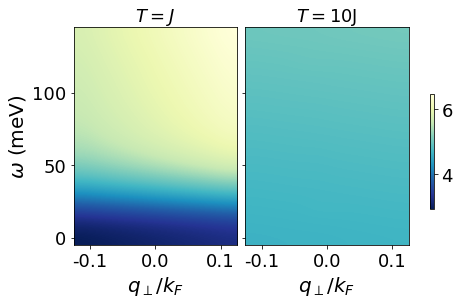

In [19]:
df2=df.sort_values(by=[ 'freq','T','theta'])
tss=float(df2['T'].unique()[0])
tss2=(df2['T'].unique())
print(tss2)
th=-4*np.pi/6
df2.loc[(df2['theta'] == -4*np.pi/6)]
df2['Q']=df2['Q']*np.sign(df2['QFX'])
T=10.0
df_one_temp=df2.loc[(df2['theta'] ==th )]
# d=df_one_temp.pivot(index='freq', columns='Q', values='SE')

def draw_heatmap(df, *args,axi,T):
       
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    # sns.heatmap(d, **kwargs)
    # im =pcolor(x,y,se[1],vmin=np.min(se[1]), vmax=np.max(se[1]))
    vmi=2.931474
    vma=6.484698
    # print(np.max(d), np.min(d))
    im=axi.imshow(d,vmin=vmi, vmax=vma, cmap='YlGnBu_r', interpolation = 'bicubic',aspect='auto',origin='lower')
    if T>1:
        axi.set_title(r"$T=$"+str(int(T))+"J", size=18)
    else:
        axi.set_title(r"$T=J$", size=18)
    
    axi.set_xlabel(r"$q_{\perp}/k_F$ ", size=20)
    
    xt=[-0.1,0.0,0.1]
    xtpos=np.array([1,5,9])-0.5
    axi.set_xticks(xtpos)
    axi.set_xticklabels(xt,size=18)
    return im

# N,M=1,2
# figure, axis = plt.subplots(N,M, sharey='all')
figure = plt.figure(figsize = (6, 4))
gs = figure.add_gridspec(1,2, wspace=.05)
axis = gs.subplots(sharey=True)
# figure.suptitle(r"$\Sigma ''(\vec{q}_{\perp}+\vec{k_F},\omega, T)$ (meV)", size=18)
# figure.set_size_inches(18.5, 10.5)
thets=df_one_temp['theta'].unique()[:2]

Tds=[tss2[0],tss2[-1]]
imlist=[]
for l,T in enumerate(Tds):
    df3=df_one_temp.loc[(df_one_temp['T'] == T )]
    Ts=df3['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    
        
    im=draw_heatmap(df3, 'Q', 'freq', 'SE', axi= axis[j], T=T)
    imlist.append(im)

yt=[0,50,100]
ytpos=np.array([0,5 ,10])
axis[0].set_yticks(ytpos)
axis[0].set_yticklabels(yt,size=18)
axis[0].set_ylabel(r"$\omega$ (meV)", size=20)
# cbar = plt.colorbar(imlist[0])
# tick_font_size = 20
# cbar.ax.tick_params(labelsize=tick_font_size)
cbar_ax = figure.add_axes([.95, 0.25, 0.01, 0.4])
cbar=figure.colorbar(im, cax=cbar_ax)
cbar.ax.tick_params(labelsize=18)
plt.tight_layout()

plt.savefig("imgs/pap_fig2.png",dpi=300, bbox_inches='tight')
plt.show()

0 0 0
1 1 1
2 0 2
3 1 0
4 0 1
5 1 2


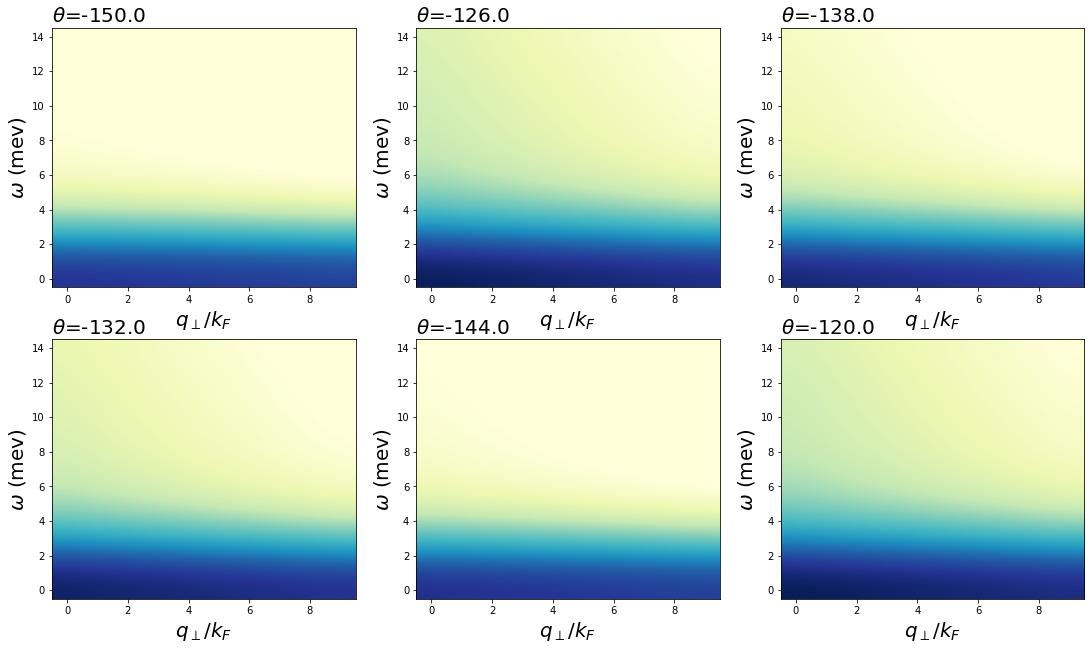

In [11]:

df2=df.sort_values(by=[ 'freq','T','theta'])
tss=float(df2['T'].unique()[0])
df2.loc[(df2['theta'] == -4*np.pi/6)]
df2['Q']=df2['Q']*np.sign(df2['QFX'])
T=1.0
df_one_temp=df2.loc[(df2['T'] == T)]
# d=df_one_temp.pivot(index='freq', columns='Q', values='SE')

def draw_heatmap(df, *args,axi):
       
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    # sns.heatmap(d, **kwargs)
    # im =pcolor(x,y,se[1],vmin=np.min(se[1]), vmax=np.max(se[1]))
    vmi=2.931474
    vma=6.484698
    # print(np.max(d), np.min(d))
    im=axi.imshow(d,vmin=vmi, vmax=vma, cmap='YlGnBu_r', interpolation = 'bicubic',aspect='auto',origin='lower')
    # axi.set_title(r"$\Sigma ''(\vec{q}_{\perp}+\vec{k_F},\omega, T="+str(T)+"J)$ (mev)", size=20)
    axi.set_ylabel(r"$\omega$ (mev)", size=20)
    axi.set_xlabel(r"$q_{\perp}/k_F$ ", size=20)
    
    # xt=[-0.1,-0.05,0.0,0.05,0.1]
    # xtpos=np.array([0,2.5,5, 7.5,10])-0.5
    # axi.set_xticks(xtpos,xt,size=20)
    # axi.set_yticks(size=20)
    # pyplot.locator_params(axis='y', nbins=4)
    # pyplot.locator_params(axis='x', nbins=7)
    # plt.tight_layout()
N,M=2,3
figure, axis = plt.subplots(N,M)
figure.set_size_inches(18.5, 10.5)
thets=df_one_temp['theta'].unique()

for l,th in enumerate(thets):
    df3=df_one_temp.loc[(df_one_temp['theta'] ==th )]
    Ts=df3['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    
        
    draw_heatmap(df3, 'Q', 'freq', 'SE', axi= axis[i,j])
        
    # axis[i,j].scatter(x[1:],(y[1:]) ,   label=r'$T$='+str(T),s=15)
    # axis[i,j].set_xlim([0,150])
    
        
    axis[i,j].set_title(r'$\theta$='+str(round(th*180/np.pi,1)),loc='left', size=20)
    # axis[i,j].set_ylabel(r"Im($\tilde{\Sigma}(k,\omega, T)-\tilde{\Sigma}(k,0, T)$) (mev)")
    # axis[i,j].set_xlabel(r"$\omega$ (mev)")
    # # axis[i,j].legend()
plt.show()

0 0 0
1 1 1
2 0 2
3 1 0
4 0 1
5 1 2


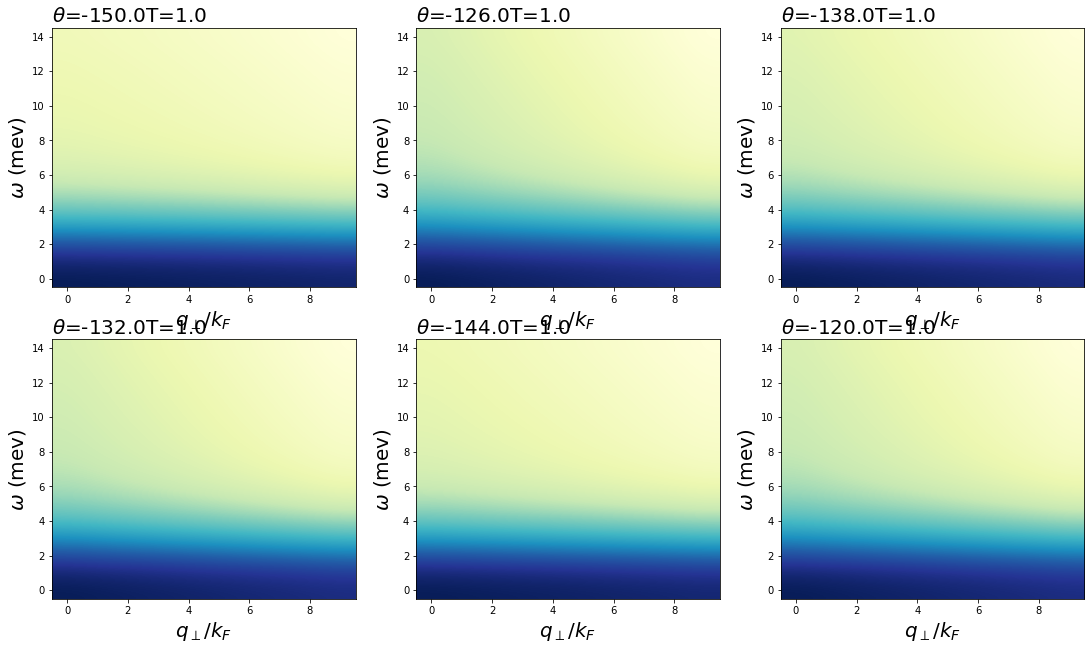

0 0 0
1 1 1
2 0 2
3 1 0
4 0 1
5 1 2


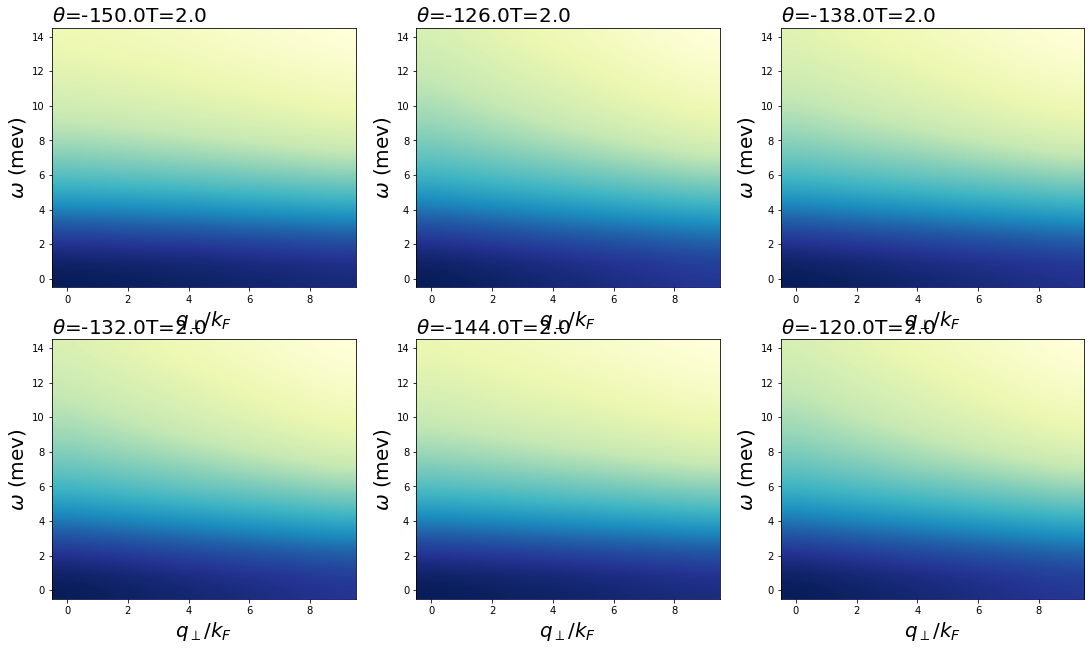

0 0 0
1 1 1
2 0 2
3 1 0
4 0 1
5 1 2


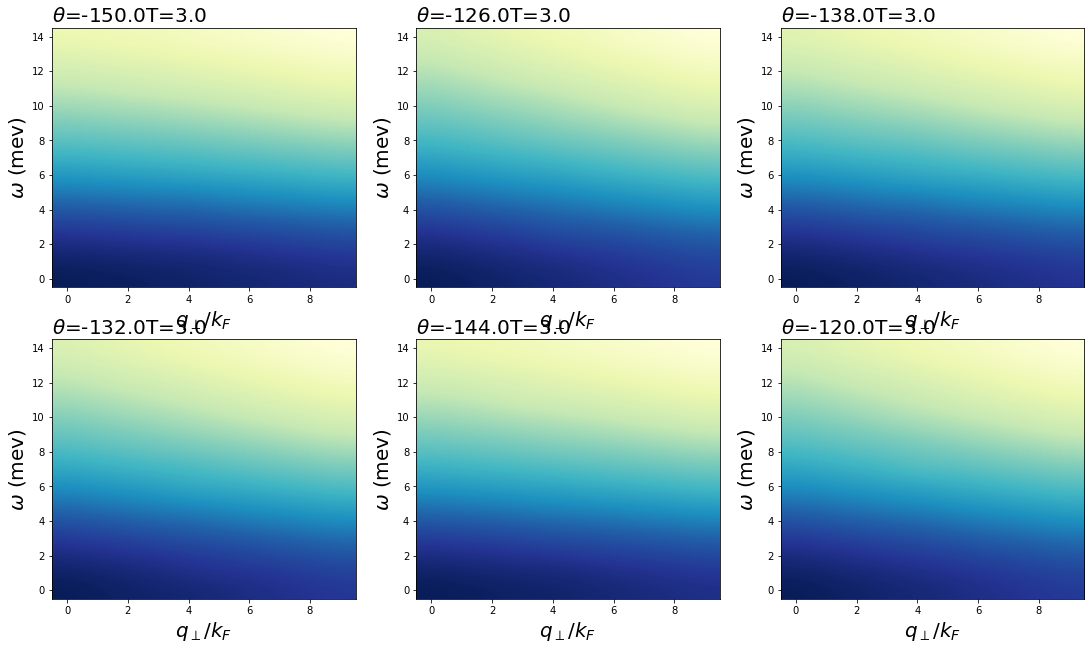

0 0 0
1 1 1
2 0 2
3 1 0
4 0 1
5 1 2


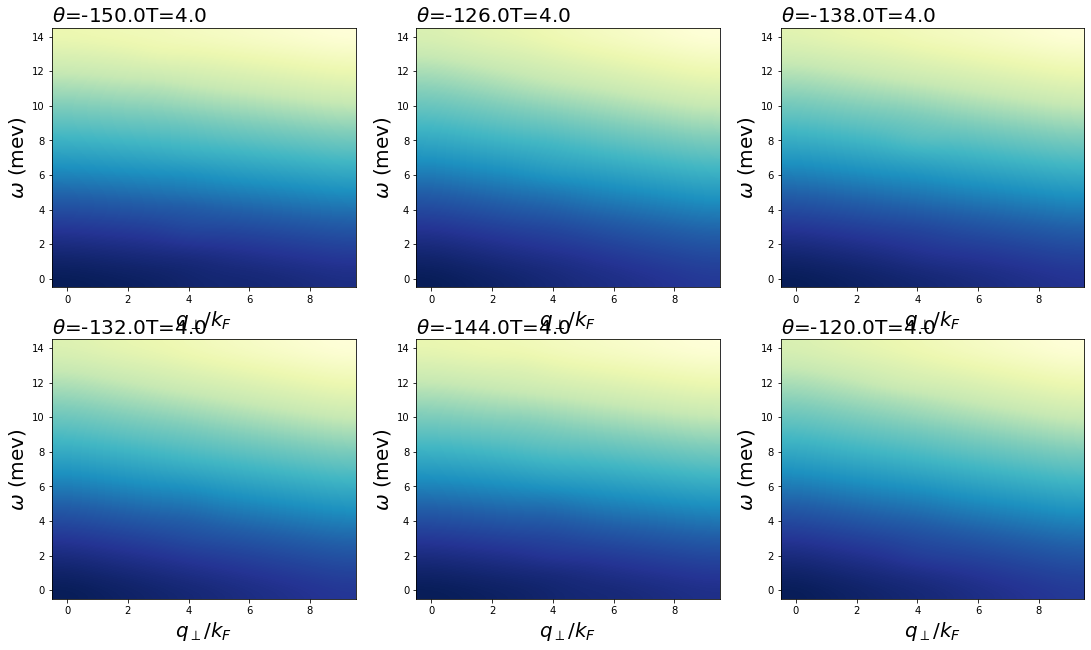

0 0 0
1 1 1
2 0 2
3 1 0
4 0 1
5 1 2


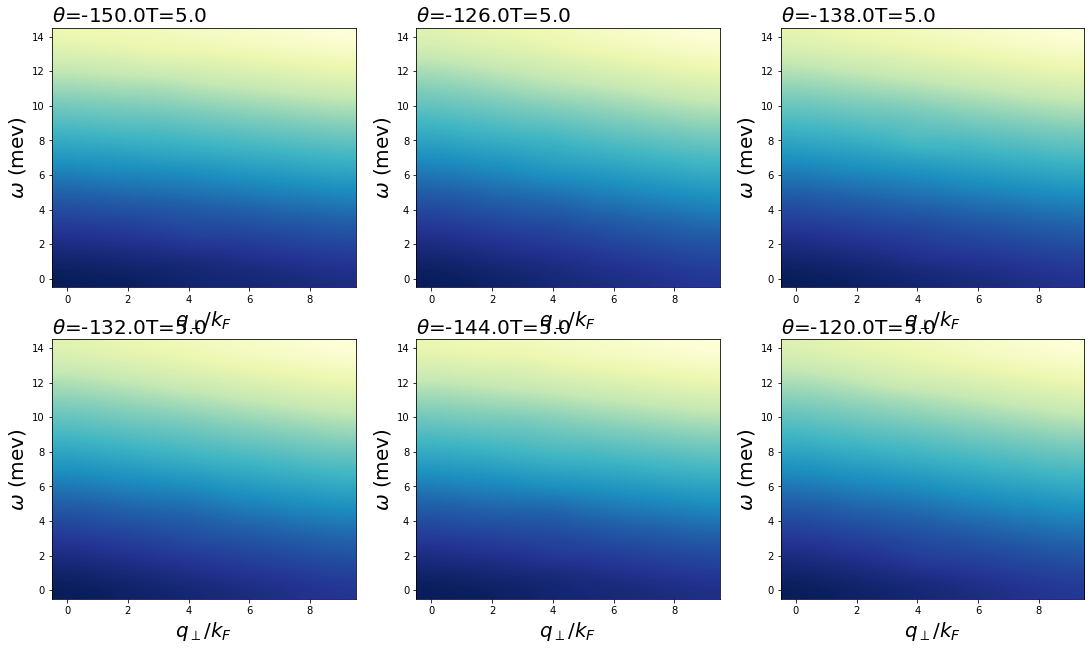

In [24]:
for T in [1.0,2.0,3.0,4.0,5.0]:
    df2=df.sort_values(by=[ 'freq','T','theta'])
    tss=float(df2['T'].unique()[0])
    df2.loc[(df2['theta'] == -4*np.pi/6)]
    df2['Q']=df2['Q']*np.sign(df2['QFX'])

    df_one_temp=df2.loc[(df2['T'] == T)]
    # d=df_one_temp.pivot(index='freq', columns='Q', values='SE')

    def draw_heatmap(df, *args,axi):
        
        d = df.pivot(index=args[1], columns=args[0], values=args[2])
        # sns.heatmap(d, **kwargs)
        # im =pcolor(x,y,se[1],vmin=np.min(se[1]), vmax=np.max(se[1]))
        vmi=2.931474
        vma=6.484698
        # print(np.max(d), np.min(d))
        # im=axi.imshow(d,vmin=vmi, vmax=vma, cmap='YlGnBu_r', interpolation = 'bicubic',aspect='auto',origin='lower')
        im=axi.imshow(d,cmap='YlGnBu_r', interpolation = 'bicubic',aspect='auto',origin='lower')
        # axi.set_title(r"$\Sigma ''(\vec{q}_{\perp}+\vec{k_F},\omega, T="+str(T)+"J)$ (mev)", size=20)
        axi.set_ylabel(r"$\omega$ (mev)", size=20)
        axi.set_xlabel(r"$q_{\perp}/k_F$ ", size=20)
        
        # xt=[-0.1,-0.05,0.0,0.05,0.1]
        # xtpos=np.array([0,2.5,5, 7.5,10])-0.5
        # axi.set_xticks(xtpos,xt,size=20)
        # axi.set_yticks(size=20)
        # pyplot.locator_params(axis='y', nbins=4)
        # pyplot.locator_params(axis='x', nbins=7)
        # plt.tight_layout()
    N,M=2,3
    figure, axis = plt.subplots(N,M)
    figure.set_size_inches(18.5, 10.5)
    thets=df_one_temp['theta'].unique()

    for l,th in enumerate(thets):
        df3=df_one_temp.loc[(df_one_temp['theta'] ==th )]
        Ts=df3['T'].unique()
        i=int(l%N)
        j=int((l%M))
        print(l,i,j)
        
            
        draw_heatmap(df3, 'Q', 'freq', 'SE', axi= axis[i,j])
            
        # axis[i,j].scatter(x[1:],(y[1:]) ,   label=r'$T$='+str(T),s=15)
        # axis[i,j].set_xlim([0,150])
        
            
        axis[i,j].set_title(r'$\theta$='+str(round(th*180/np.pi,1))+"T="+str(T),loc='left', size=20)
        # axis[i,j].set_ylabel(r"Im($\tilde{\Sigma}(k,\omega, T)-\tilde{\Sigma}(k,0, T)$) (mev)")
        # axis[i,j].set_xlabel(r"$\omega$ (mev)")
        # # axis[i,j].legend()
    plt.show()

# Extracting fits at low $\omega$, $q$, $T$

[ 0.03085685 -0.03085685  0.09257056 -0.09257056  0.15428427 -0.15428427
  0.21599798 -0.21599798  0.27771169 -0.27771169  0.0305976  -0.0305976
  0.0917928  -0.0917928   0.152988   -0.152988    0.2141832  -0.2141832
  0.2753784  -0.2753784   0.02996797 -0.02996797 -0.0899039   0.0899039
 -0.14983984  0.14983984 -0.20977577  0.20977577  0.26971171 -0.26971171
  0.02935898 -0.02935898  0.08807694 -0.08807694  0.1467949  -0.1467949
  0.20551286 -0.20551286  0.26423082 -0.26423082  0.0289302  -0.0289302
  0.08679061 -0.08679061  0.14465102 -0.14465102  0.20251143 -0.20251143
  0.26037184 -0.26037184  0.02878518 -0.02878518  0.08635553 -0.08635553
  0.14392589 -0.14392589  0.20149624 -0.20149624  0.2590666  -0.2590666 ]
(150, 18) 60
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


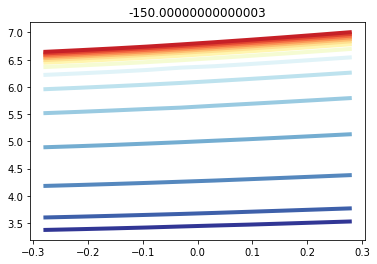

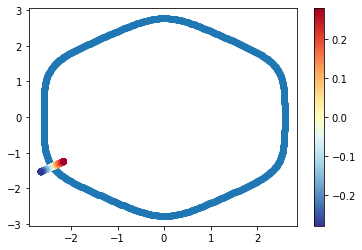

(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


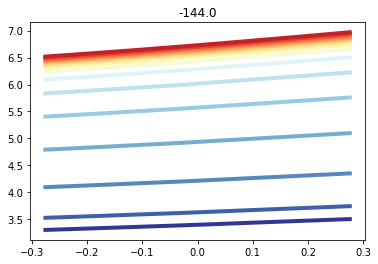

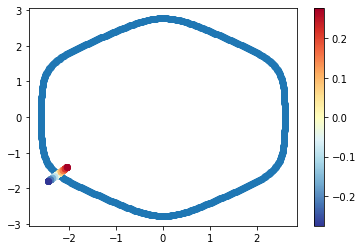

(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


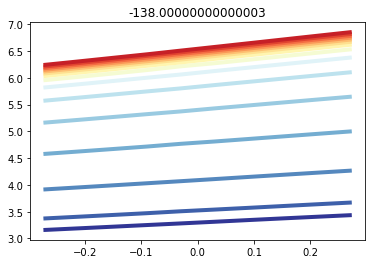

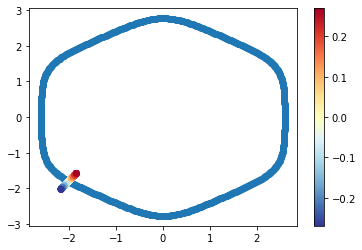

(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


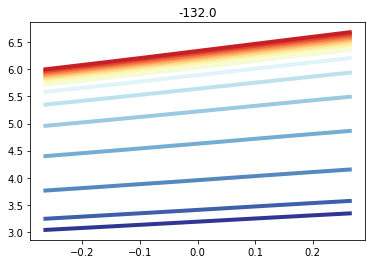

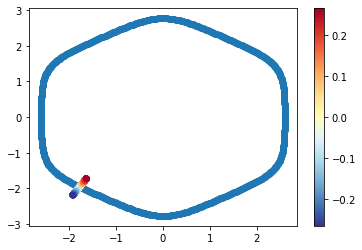

(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


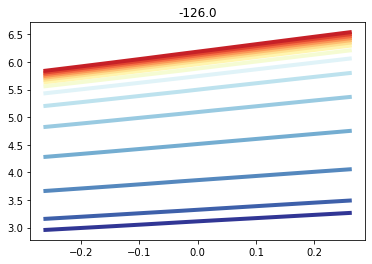

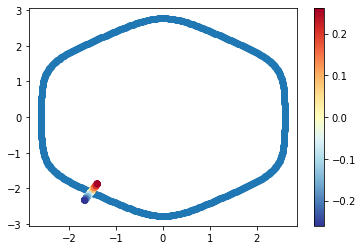

(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


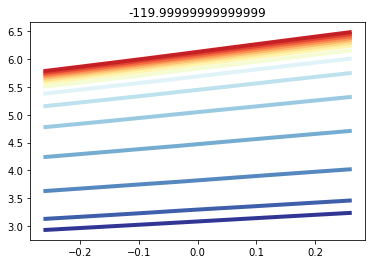

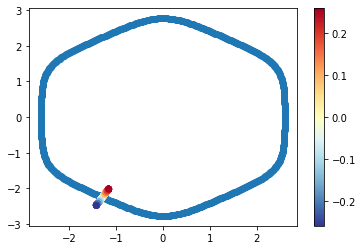

In [25]:

path=pathy+'/data/ME_scans/T1data_ME_2022-05-01-14-38-23.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
Qu=df['Q'].unique()
T=1.0
print(Qu)

def fit(df, *args,axi,Q,w,l):
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    sW=np.size(w)
    for s,Qq in enumerate(w):
        print(s)
        plot(d.iloc[s], linewidth=4, color=plt.cm.RdYlBu_r(s/float(sW)))
        title(str(thets[l]*180/np.pi))
        
    return None


thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    print(np.shape(df2), np.size(Qu))
    Qu=df2['Q'].unique()
    w=df2['freq'].unique()
    fit(df2, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l)
    show()
    plt.scatter(df2['KFX']+df2['QFX'],df2['KFY']+df2['QFY'], c=df2['Q'],zorder=10, cmap='RdYlBu_r')
    plt.colorbar()
    plt.scatter(KxFS,KyFS, zorder=0)
    plt.show()
    

[ 0.03085685 -0.03085685  0.09257056 -0.09257056  0.15428427 -0.15428427
  0.21599798 -0.21599798  0.27771169 -0.27771169  0.0305976  -0.0305976
  0.0917928  -0.0917928   0.152988   -0.152988    0.2141832  -0.2141832
  0.2753784  -0.2753784   0.02996797 -0.02996797 -0.0899039   0.0899039
 -0.14983984  0.14983984 -0.20977577  0.20977577  0.26971171 -0.26971171
  0.02935898 -0.02935898  0.08807694 -0.08807694  0.1467949  -0.1467949
  0.20551286 -0.20551286  0.26423082 -0.26423082  0.0289302  -0.0289302
  0.08679061 -0.08679061  0.14465102 -0.14465102  0.20251143 -0.20251143
  0.26037184 -0.26037184  0.02878518 -0.02878518  0.08635553 -0.08635553
  0.14392589 -0.14392589  0.20149624 -0.20149624  0.2590666  -0.2590666 ]
(150, 18) 60
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


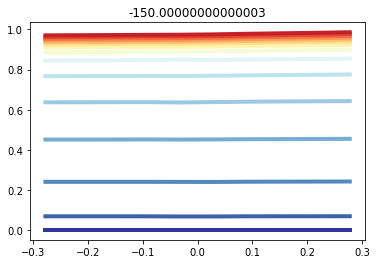

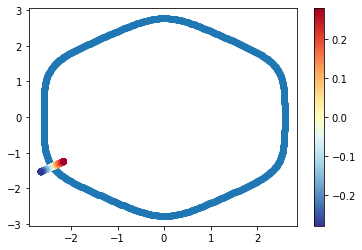

(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


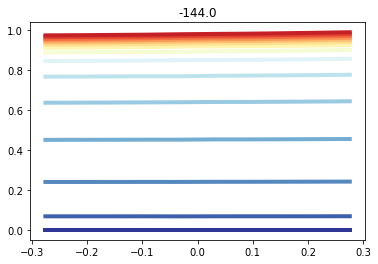

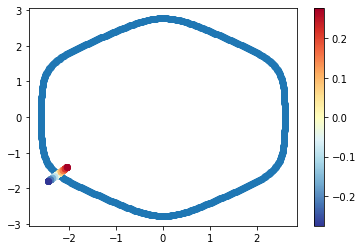

(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


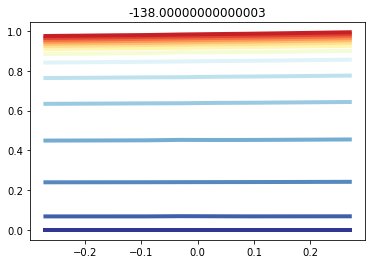

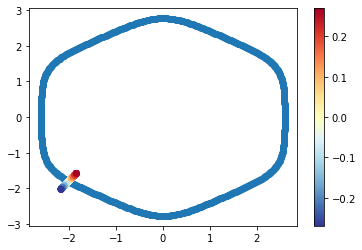

(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


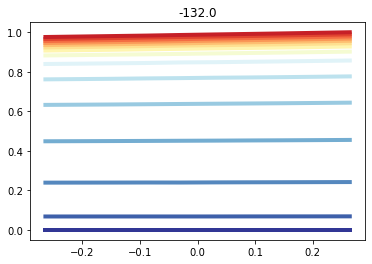

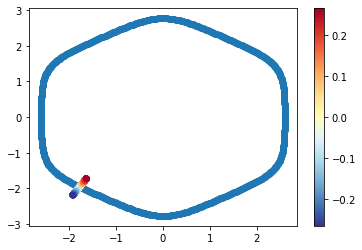

(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


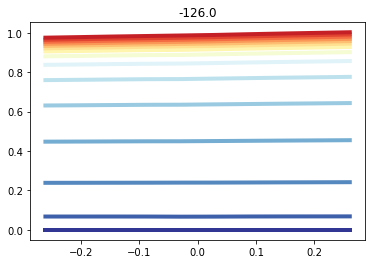

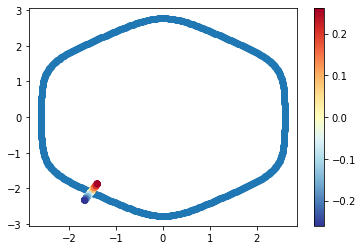

(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


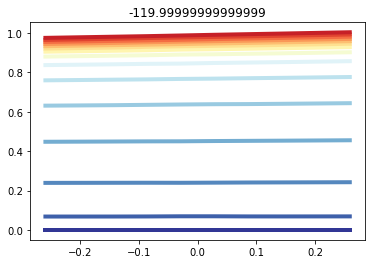

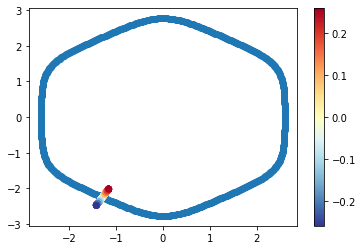

In [26]:

path=pathy+'/data/ME_scans/T1data_ME_2022-05-01-14-38-23.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
Qu=df['Q'].unique()
T=1.0
print(Qu)

def fit(df, *args,axi,Q,w,l):
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    sW=np.size(w)
    for s,Qq in enumerate(w):
        print(s)
        plot((d.iloc[s]-d.iloc[0])/d.iloc[0], linewidth=4, color=plt.cm.RdYlBu_r(s/float(sW)))
        title(str(thets[l]*180/np.pi))
        
    return None


thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    print(np.shape(df2), np.size(Qu))
    Qu=df2['Q'].unique()
    w=df2['freq'].unique()
    fit(df2, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l)
    show()
    plt.scatter(df2['KFX']+df2['QFX'],df2['KFY']+df2['QFY'], c=df2['Q'],zorder=10, cmap='RdYlBu_r')
    plt.colorbar()
    plt.scatter(KxFS,KyFS, zorder=0)
    plt.show()

[ 0.03085685 -0.03085685  0.09257056 -0.09257056  0.15428427 -0.15428427
  0.21599798 -0.21599798  0.27771169 -0.27771169  0.0305976  -0.0305976
  0.0917928  -0.0917928   0.152988   -0.152988    0.2141832  -0.2141832
  0.2753784  -0.2753784   0.02996797 -0.02996797 -0.0899039   0.0899039
 -0.14983984  0.14983984 -0.20977577  0.20977577  0.26971171 -0.26971171
  0.02935898 -0.02935898  0.08807694 -0.08807694  0.1467949  -0.1467949
  0.20551286 -0.20551286  0.26423082 -0.26423082  0.0289302  -0.0289302
  0.08679061 -0.08679061  0.14465102 -0.14465102  0.20251143 -0.20251143
  0.26037184 -0.26037184  0.02878518 -0.02878518  0.08635553 -0.08635553
  0.14392589 -0.14392589  0.20149624 -0.20149624  0.2590666  -0.2590666 ]
(150, 18) 60


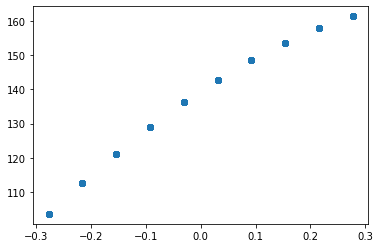

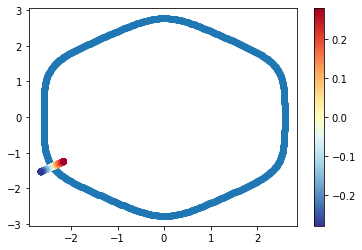

(150, 18) 10


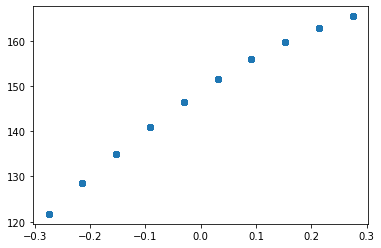

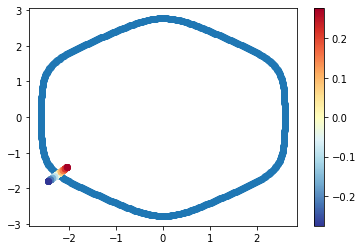

(150, 18) 10


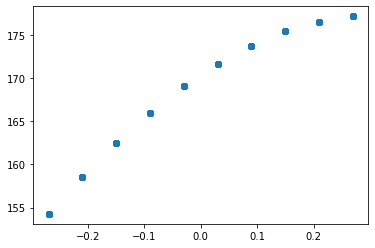

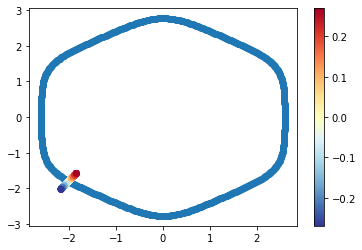

(150, 18) 10


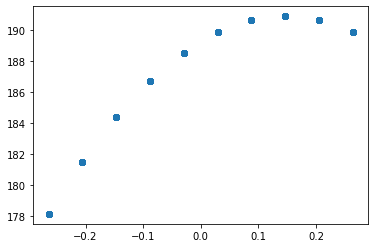

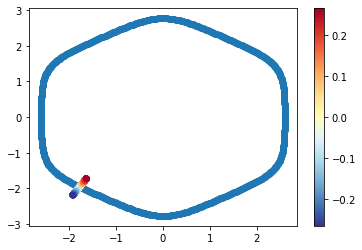

(150, 18) 10


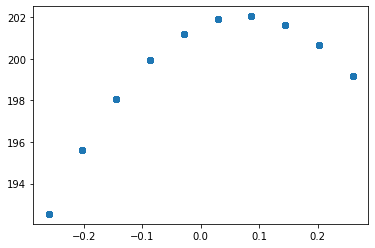

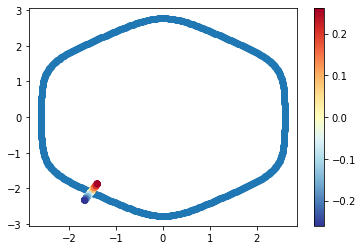

(150, 18) 10


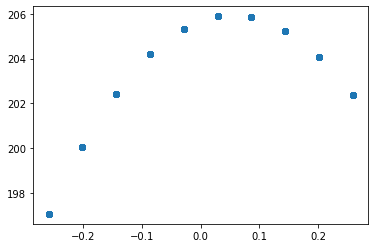

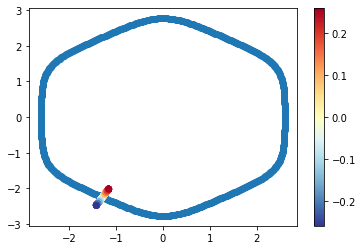

In [27]:

path=pathy+'/data/ME_scans/T1data_ME_2022-05-01-14-38-23.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
Qu=df['Q'].unique()
T=1.0
print(Qu)

def fit(df, *args,axi,Q,w,l):
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    sW=np.size(w)
    

thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    print(np.shape(df2), np.size(Qu))
    Qu=np.sort(np.array(df2['Q'].unique()))
    w=df2['freq'].unique()
    
    [vx,vy]=Fermi_Vel(df2['KFX']+df2['QFX'],df2['KFY']+df2['QFY'])
    vf=np.sqrt(vx**2+vy**2)
    plt.scatter(df2['Q'],vf)
    show()
    plt.scatter(df2['KFX']+df2['QFX'],df2['KFY']+df2['QFY'], c=df2['Q'],zorder=10, cmap='RdYlBu_r')
    plt.colorbar()
    plt.scatter(KxFS,KyFS, zorder=0)
    plt.show()

[ 0.03085685 -0.03085685  0.09257056 -0.09257056  0.15428427 -0.15428427
  0.21599798 -0.21599798  0.27771169 -0.27771169  0.0305976  -0.0305976
  0.0917928  -0.0917928   0.152988   -0.152988    0.2141832  -0.2141832
  0.2753784  -0.2753784   0.02996797 -0.02996797 -0.0899039   0.0899039
 -0.14983984  0.14983984 -0.20977577  0.20977577  0.26971171 -0.26971171
  0.02935898 -0.02935898  0.08807694 -0.08807694  0.1467949  -0.1467949
  0.20551286 -0.20551286  0.26423082 -0.26423082  0.0289302  -0.0289302
  0.08679061 -0.08679061  0.14465102 -0.14465102  0.20251143 -0.20251143
  0.26037184 -0.26037184  0.02878518 -0.02878518  0.08635553 -0.08635553
  0.14392589 -0.14392589  0.20149624 -0.20149624  0.2590666  -0.2590666 ]
(150, 18) 60


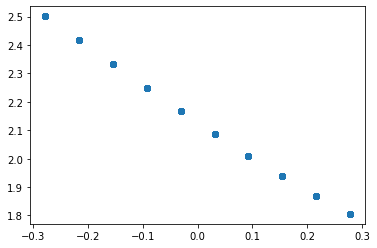

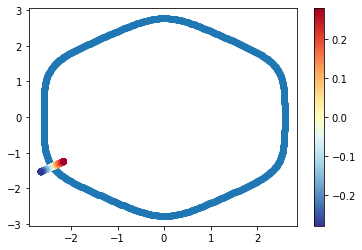

(150, 18) 10


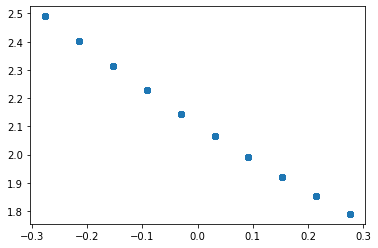

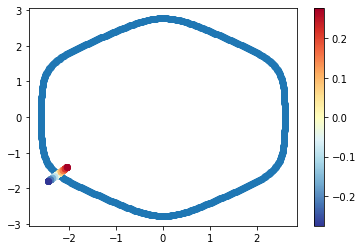

(150, 18) 10


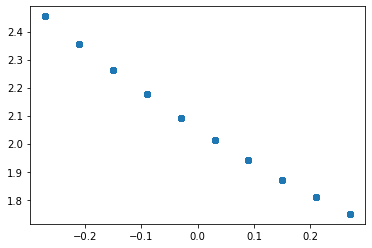

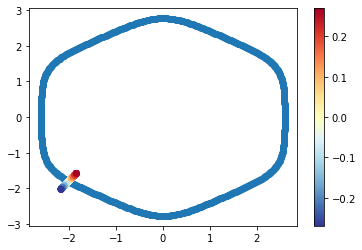

(150, 18) 10


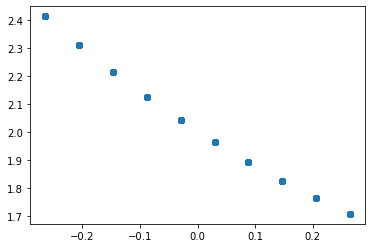

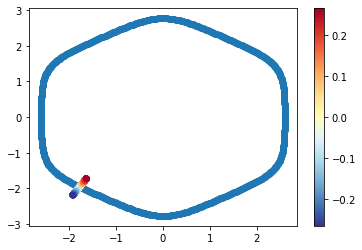

(150, 18) 10


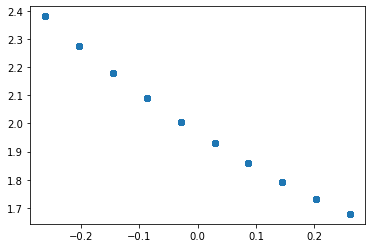

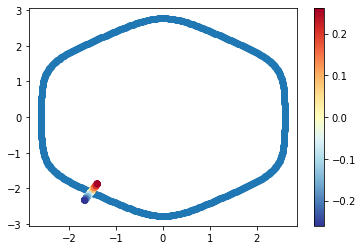

(150, 18) 10


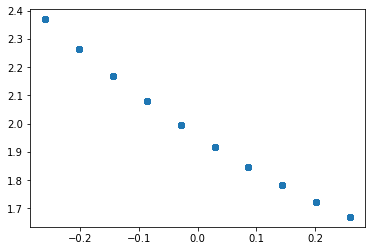

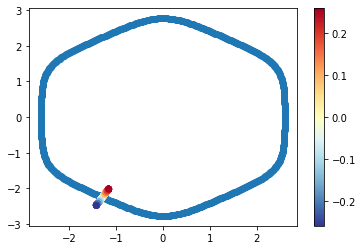

In [28]:

path=pathy+'/data/ME_scans/T1data_ME_2022-05-01-14-38-23.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
Qu=df['Q'].unique()
T=1.0
print(Qu)

def fit(df, *args,axi,Q,w,l):
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    sW=np.size(w)
    
SS=StructureFactor.StructureFac_fit_F(1)
thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    print(np.shape(df2), np.size(Qu))
    Qu=np.sort(np.array(df2['Q'].unique()))
    w=df2['freq'].unique()
    
    S=SS.Dynamical_SF(df2['KFX']+df2['QFX'],df2['KFY']+df2['QFY'],0)
    # S2=SS.Static_SF(df2['KFX']+df2['QFX'],df2['KFY']+df2['QFY'])
    plt.scatter(df2['Q'],S)
    show()
    plt.scatter(df2['KFX']+df2['QFX'],df2['KFY']+df2['QFY'], c=df2['Q'],zorder=10, cmap='RdYlBu_r')
    plt.colorbar()
    plt.scatter(KxFS,KyFS, zorder=0)
    plt.show()

[ 0.03085685 -0.03085685  0.09257056 -0.09257056  0.15428427 -0.15428427
  0.21599798 -0.21599798  0.27771169 -0.27771169  0.0305976  -0.0305976
  0.0917928  -0.0917928   0.152988   -0.152988    0.2141832  -0.2141832
  0.2753784  -0.2753784   0.02996797 -0.02996797 -0.0899039   0.0899039
 -0.14983984  0.14983984 -0.20977577  0.20977577  0.26971171 -0.26971171
  0.02935898 -0.02935898  0.08807694 -0.08807694  0.1467949  -0.1467949
  0.20551286 -0.20551286  0.26423082 -0.26423082  0.0289302  -0.0289302
  0.08679061 -0.08679061  0.14465102 -0.14465102  0.20251143 -0.20251143
  0.26037184 -0.26037184  0.02878518 -0.02878518  0.08635553 -0.08635553
  0.14392589 -0.14392589  0.20149624 -0.20149624  0.2590666  -0.2590666 ]
(150, 18) 60


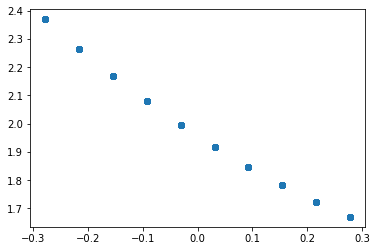

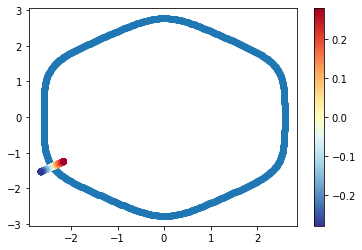

(150, 18) 10


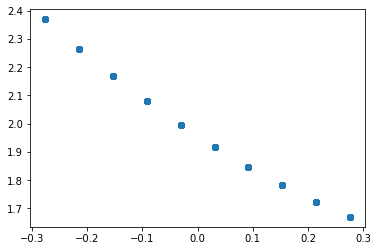

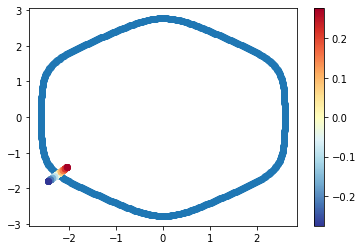

(150, 18) 10


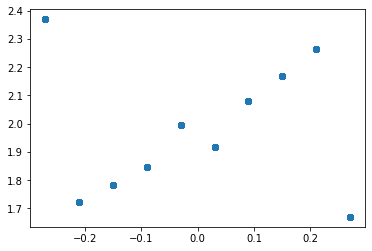

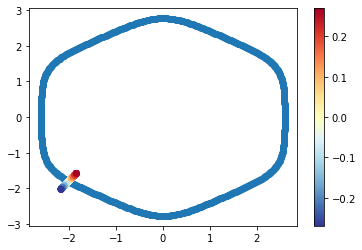

(150, 18) 10


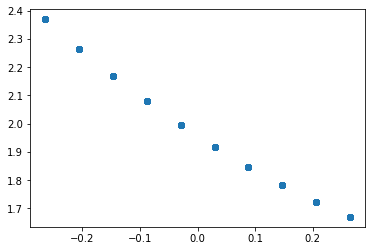

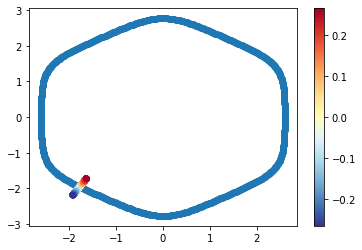

(150, 18) 10


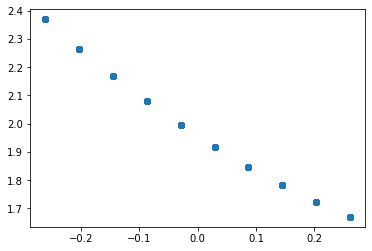

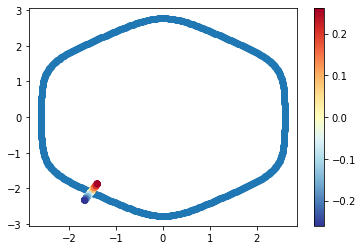

(150, 18) 10


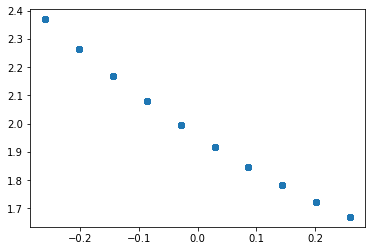

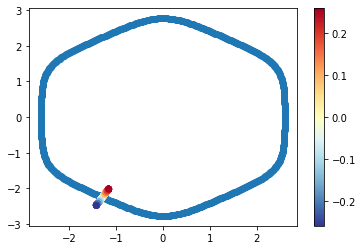

In [29]:
path=pathy+'/data/ME_scans/T1data_ME_2022-05-01-14-38-23.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
Qu=df['Q'].unique()
T=1.0
print(Qu)

def fit(df, *args,axi,Q,w,l):
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    sW=np.size(w)
    
SS=StructureFactor.StructureFac_fit_F(1)
thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    print(np.shape(df2), np.size(Qu))
    Qu=np.sort(np.array(df2['Q'].unique()))
    w=df2['freq'].unique()
    
    # S=SS.Dynamical_SF(df2['KFX']+df2['QFX'],df2['KFY']+df2['QFY'],0)
    S2=SS.Static_SF(df2['KFX']+df2['QFX'],df2['KFY']+df2['QFY'])
    plt.scatter(df2['Q'],S)
    show()
    plt.scatter(df2['KFX']+df2['QFX'],df2['KFY']+df2['QFY'], c=df2['Q'],zorder=10, cmap='RdYlBu_r')
    plt.colorbar()
    plt.scatter(KxFS,KyFS, zorder=0)
    plt.show()

In [ ]:

path=pathy+'/data/ME_scans/T1data_ME_2022-05-01-14-38-23.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
Qu=df['Q'].unique()
T=1.0
print(Qu)

def fit(df, *args,axi,Q,w,l):
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    sW=np.size(w)
    for s,Qq in enumerate(w):
        print(s)
        plot((d.iloc[s]-d.iloc[0])/d.iloc[0], linewidth=4, color=plt.cm.RdYlBu_r(s/float(sW)))
        title(str(thets[l]*180/np.pi))
        
    return None


thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    print(np.shape(df2), np.size(Qu))
    Qu=df2['Q'].unique()
    w=df2['freq'].unique()
    fit(df2, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l)
    show()
    plt.scatter(df2['KFX']+df2['QFX'],df2['KFY']+df2['QFY'], c=df2['Q'],zorder=10, cmap='RdYlBu_r')
    plt.colorbar()
    plt.scatter(KxFS,KyFS, zorder=0)
    plt.show()